In [20]:
import keras
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from itertools import count
from sklearn.metrics import accuracy_score
from keras.datasets import fashion_mnist,mnist
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten, Activation, Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.callbacks import EarlyStopping, CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from scipy.stats import pearsonr
from tqdm import tqdm
from scipy import ndimage
from IPython.display import clear_output

In [5]:
BATCH_SIZE = 128
EPOCHS = 9999
IMAGE_SIZE = 28
NUM_CLASSES = 10
NUM_CHANNELS = 1
MODEL_NAME = "MNIST_data_augmentation"
PATH = ""
NR_OF_RUNS = 10

In [6]:
def preprocess(imgs):
    return imgs.reshape(imgs.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [46]:
def rotate_image(image):
        angles = np.linspace(1,5,10)
        rotation_angle = np.random.choice(angles)
        if np.random.rand() < 0.5:
            image = ndimage.rotate(image, rotation_angle, reshape = False)
        else:
            image = ndimage.rotate(image, -rotation_angle, reshape = False) 
        return image

In [27]:
def horizontal_shift(image):
        num_rows, num_cols = image.shape[:2]
        if np.random.rand() < 0.5:
            translation_matrix = np.float32([ [1,0,1], [0,1,0] ])
            image = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))

        else:
            translation_matrix = np.float32([ [1,0,-1], [0,1,0] ])
            image = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))

        return image

In [35]:
def vertical_shift(image):
        num_rows, num_cols = image.shape[:2]
        if np.random.rand() < 0.5:
            translation_matrix = np.float32([ [1,0,0], [0,1,1] ])
            image = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))
    
        else:
            translation_matrix = np.float32([ [1,0,0], [0,1,-1] ])
            image = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows))

        return image

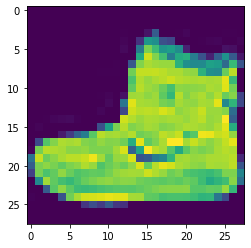

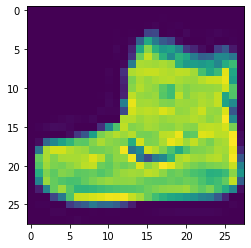

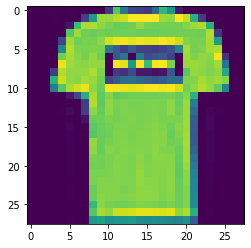

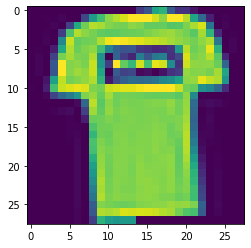

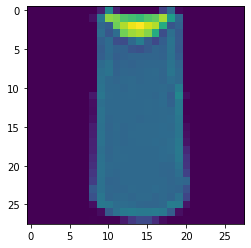

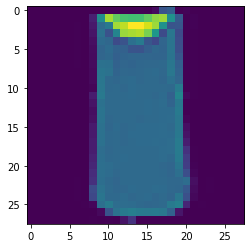

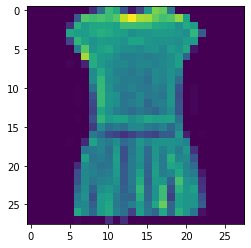

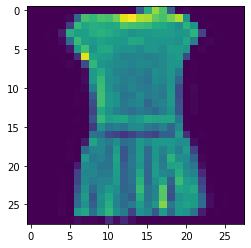

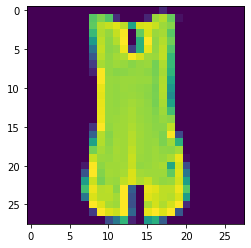

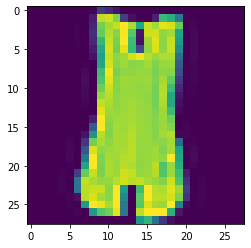

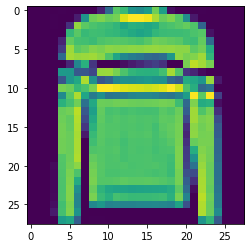

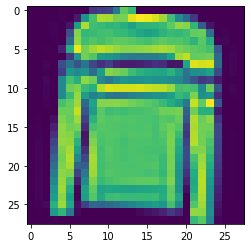

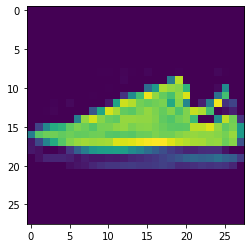

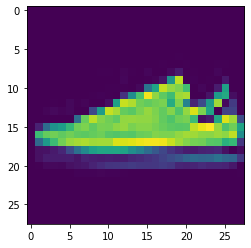

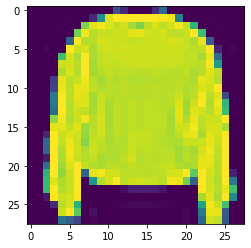

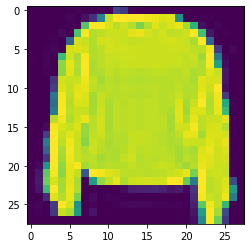

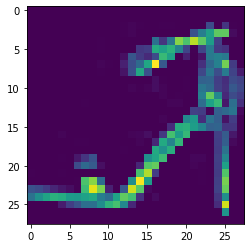

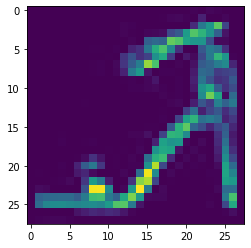

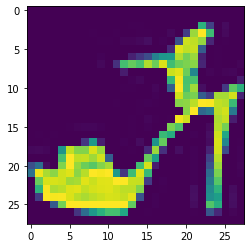

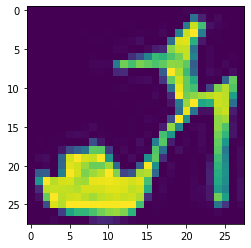

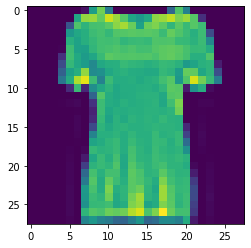

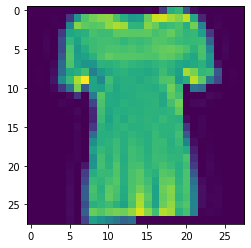

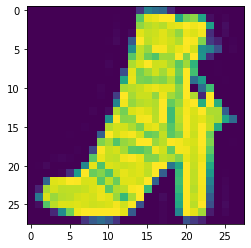

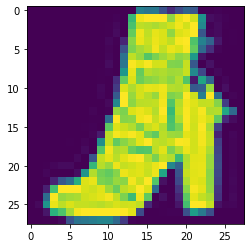

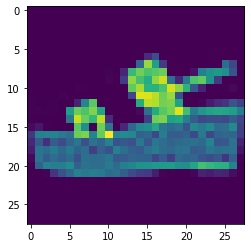

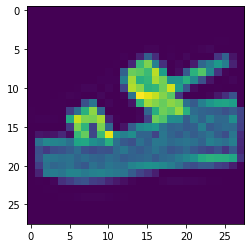

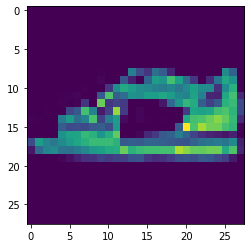

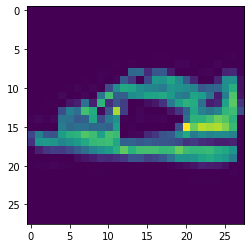

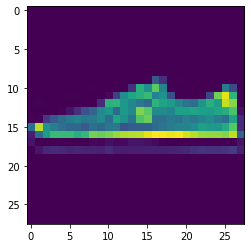

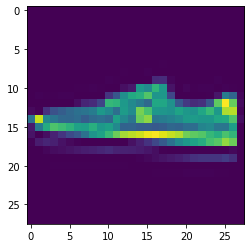

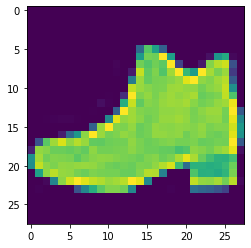

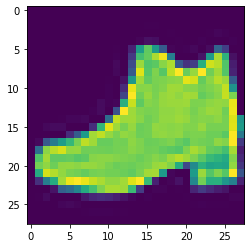

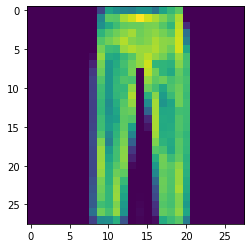

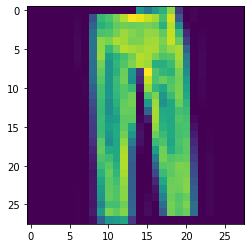

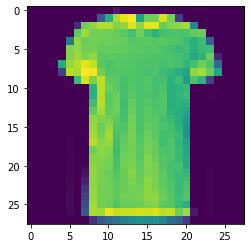

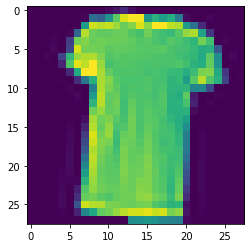

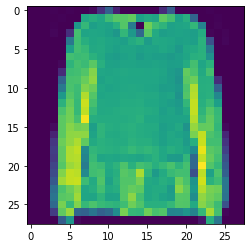

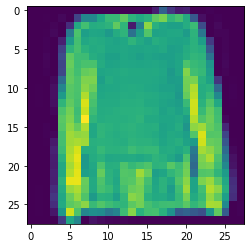

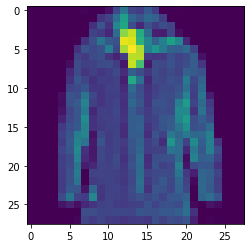

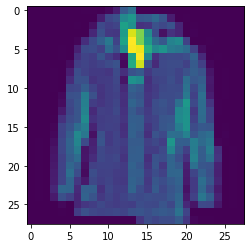

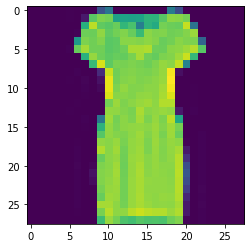

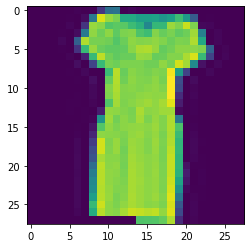

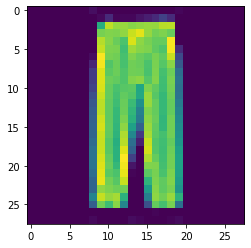

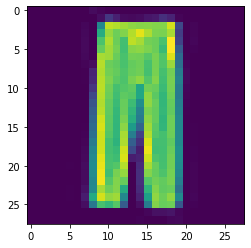

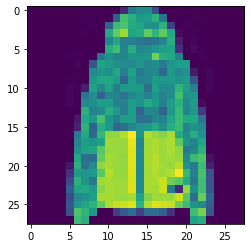

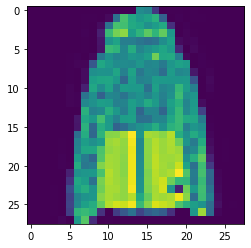

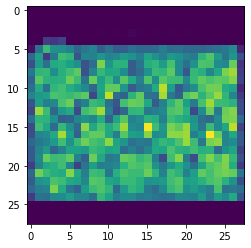

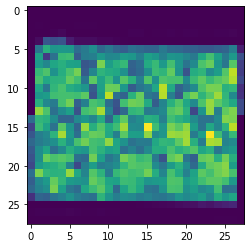

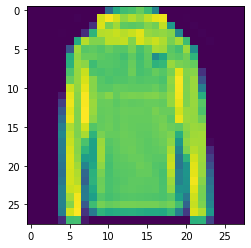

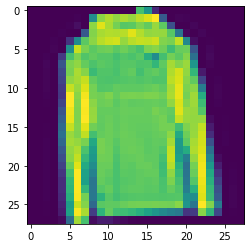

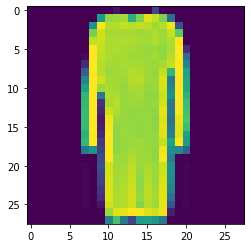

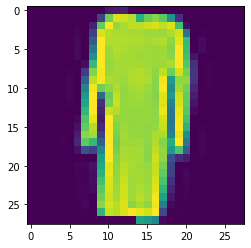

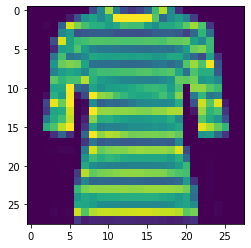

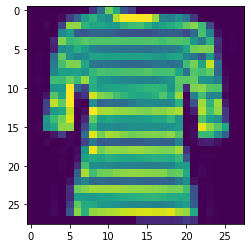

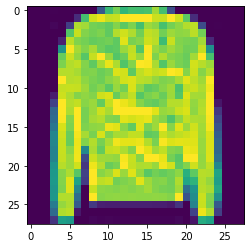

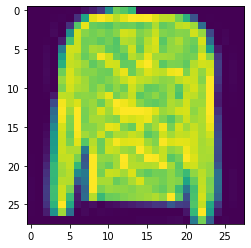

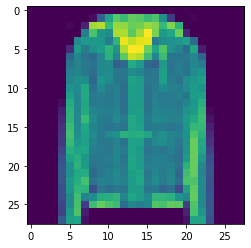

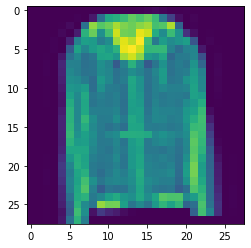

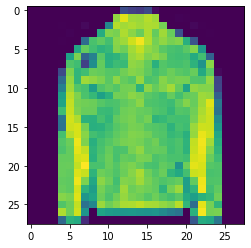

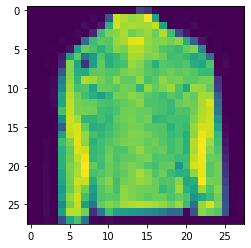

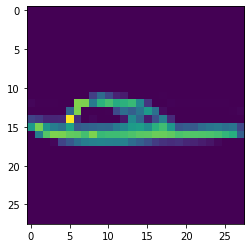

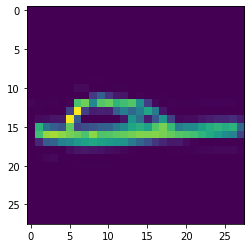

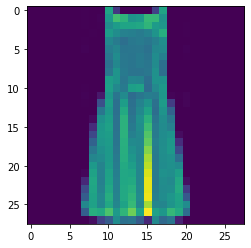

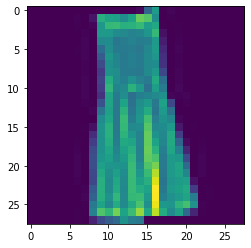

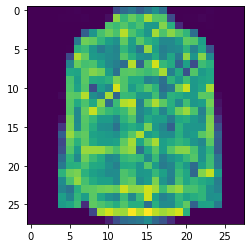

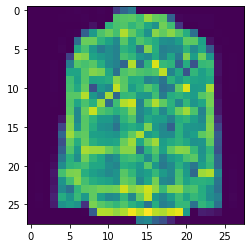

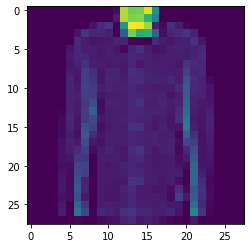

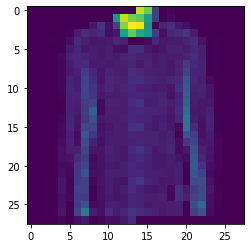

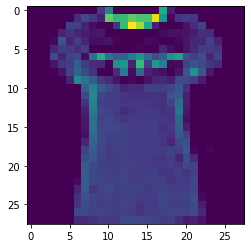

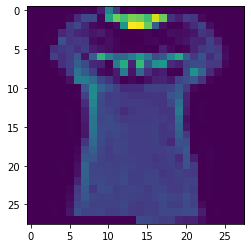

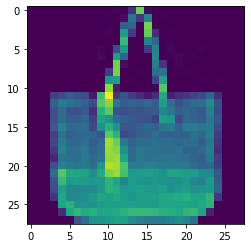

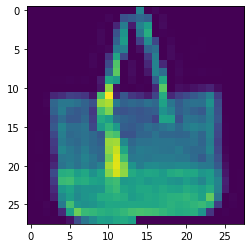

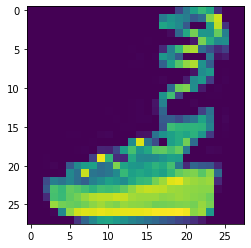

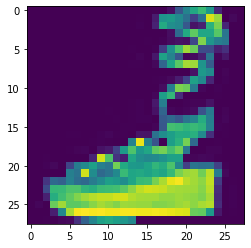

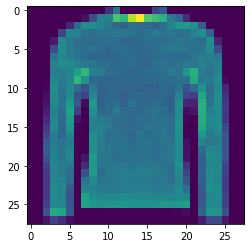

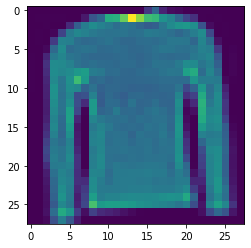

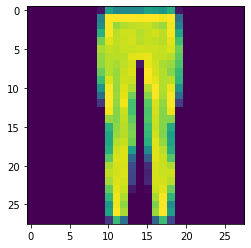

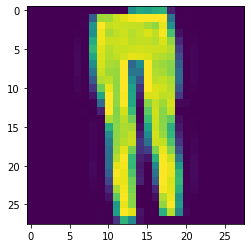

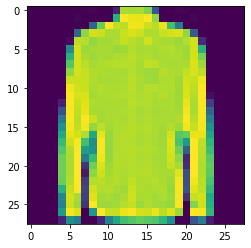

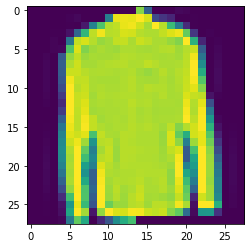

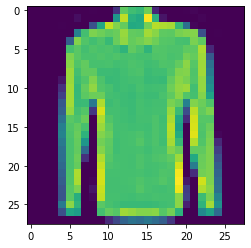

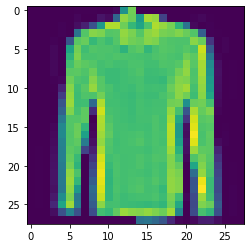

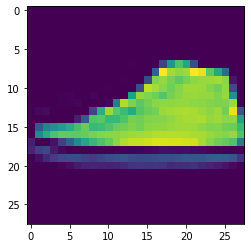

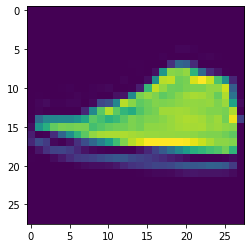

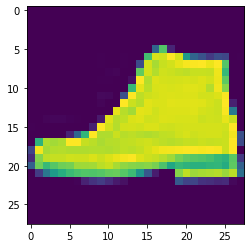

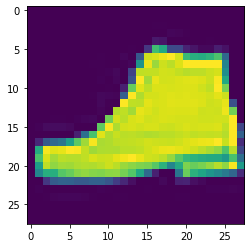

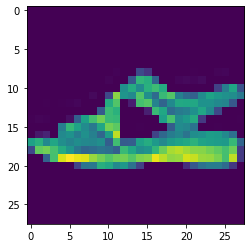

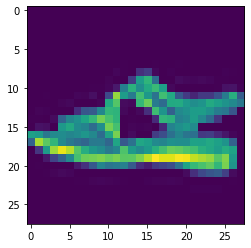

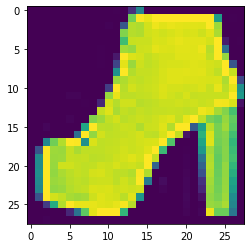

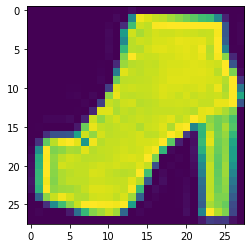

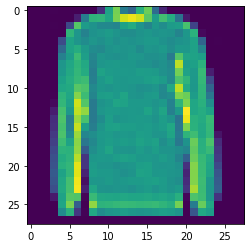

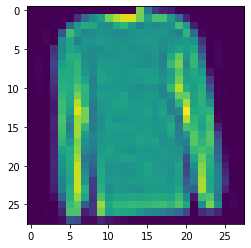

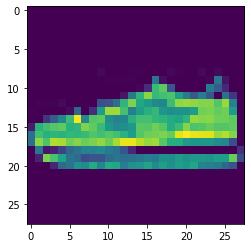

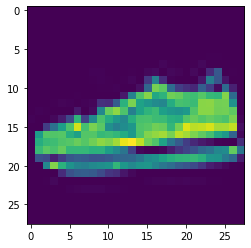

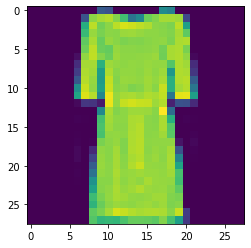

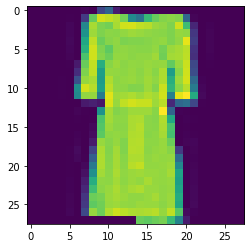

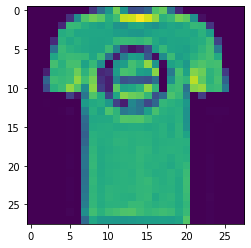

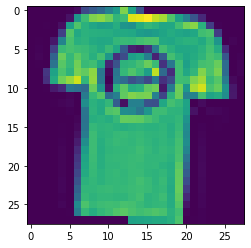

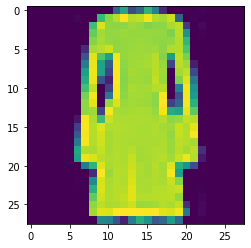

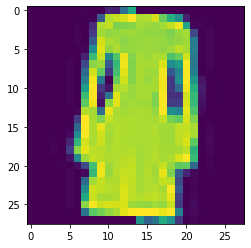

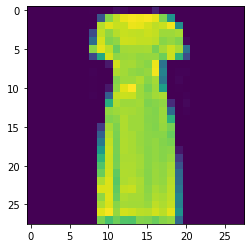

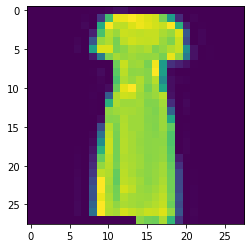

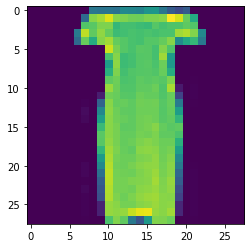

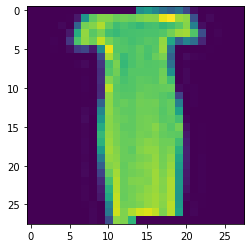

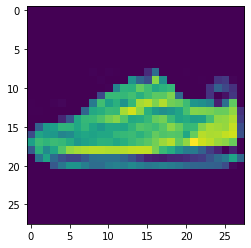

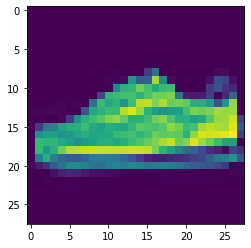

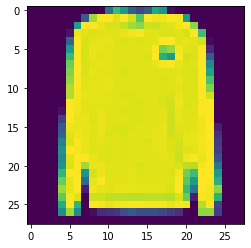

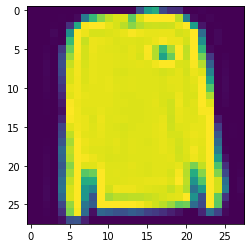

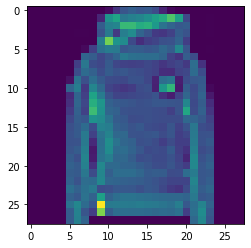

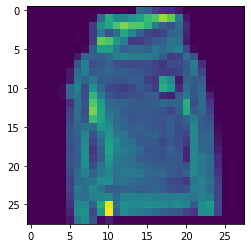

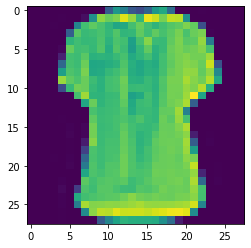

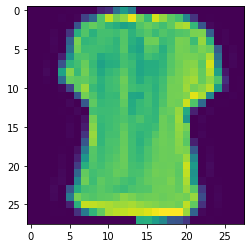

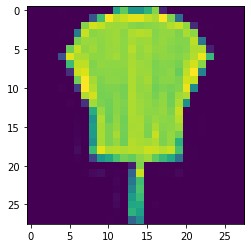

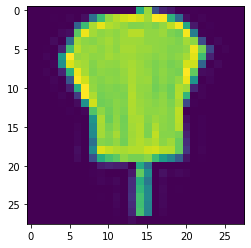

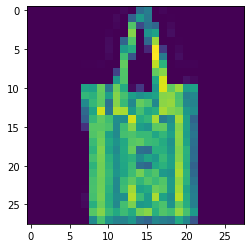

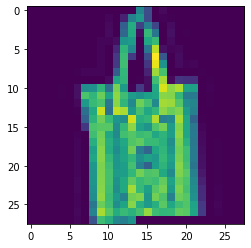

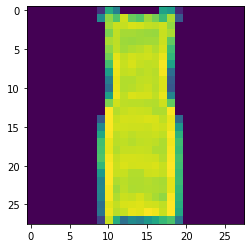

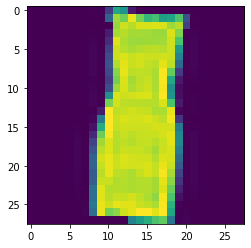

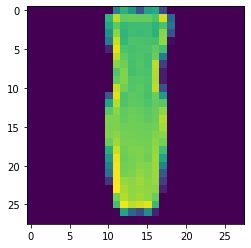

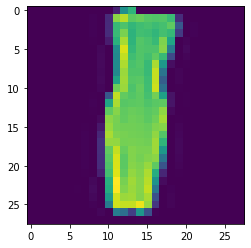

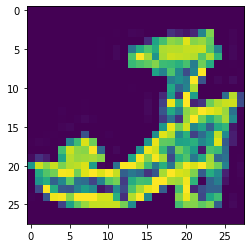

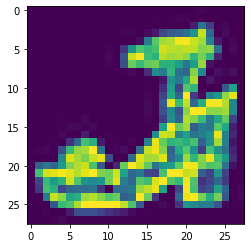

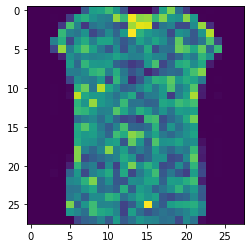

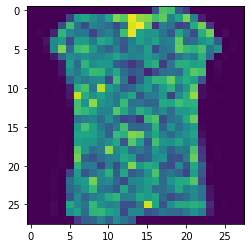

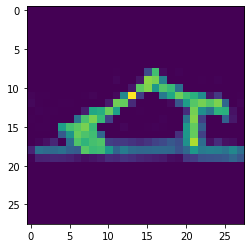

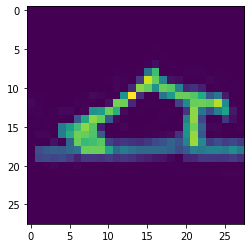

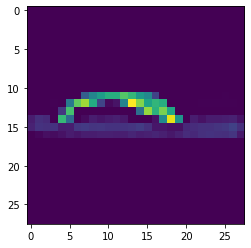

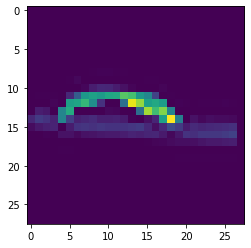

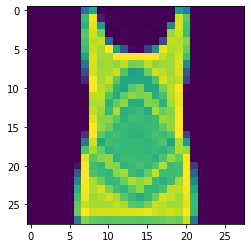

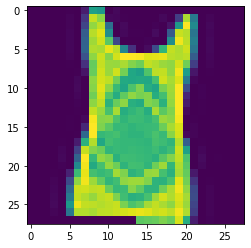

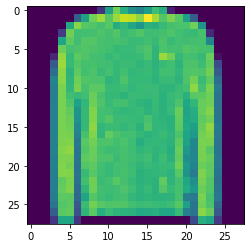

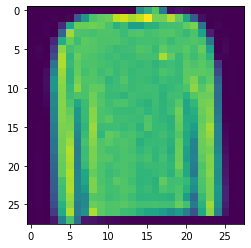

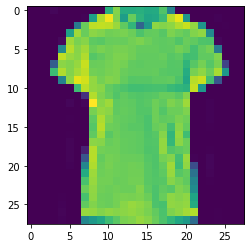

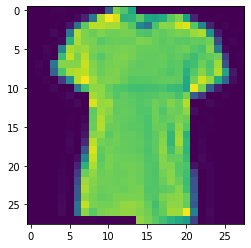

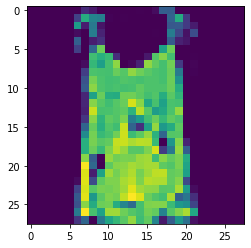

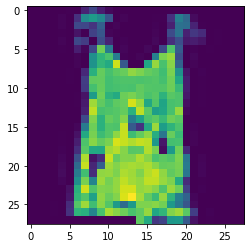

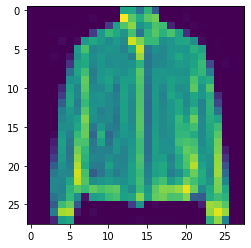

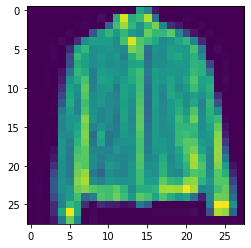

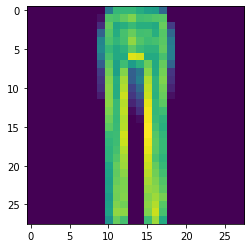

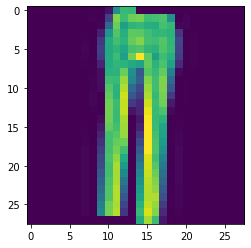

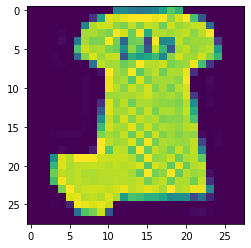

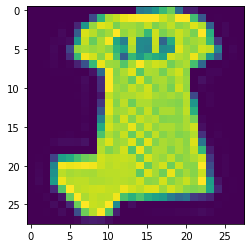

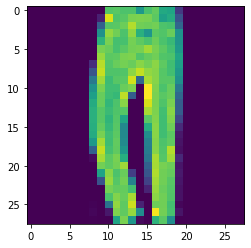

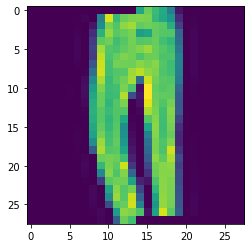

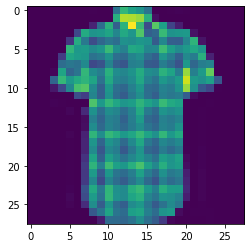

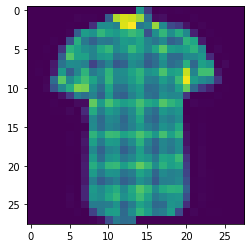

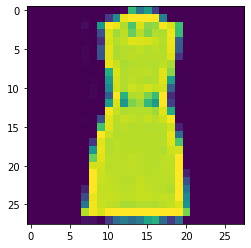

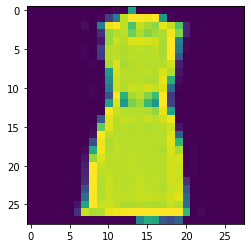

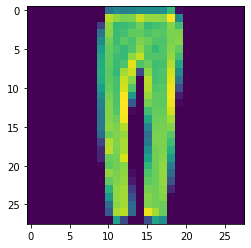

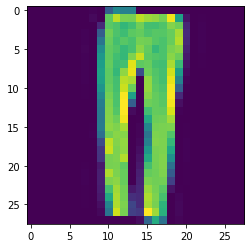

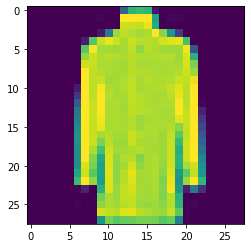

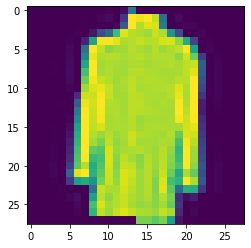

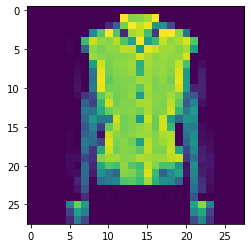

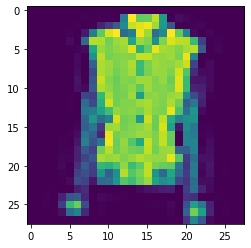

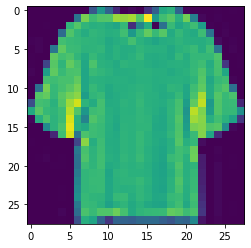

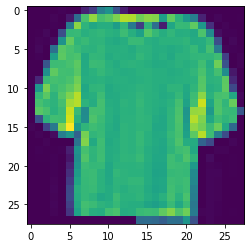

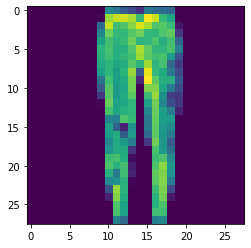

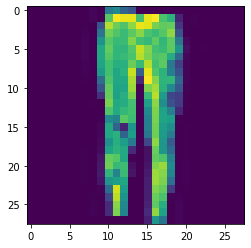

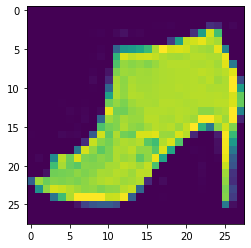

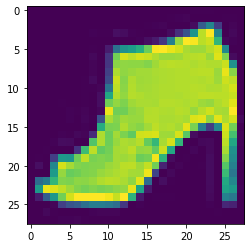

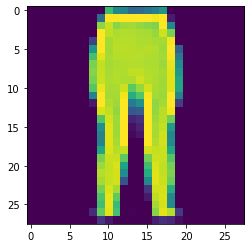

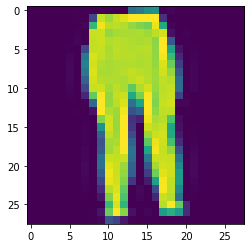

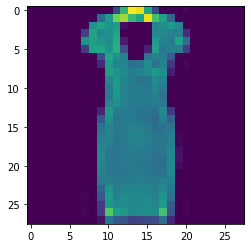

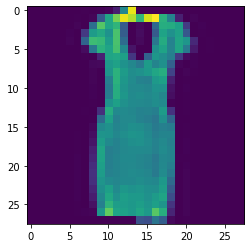

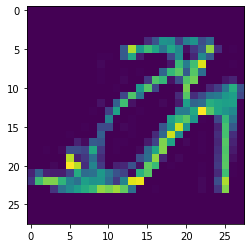

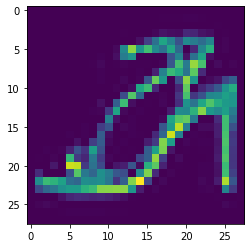

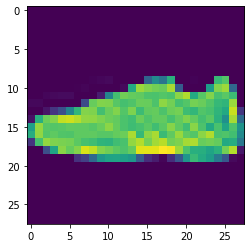

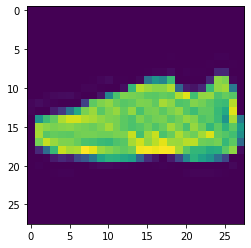

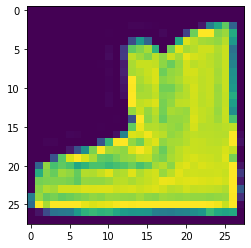

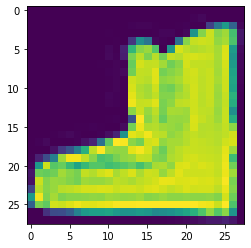

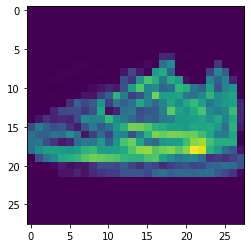

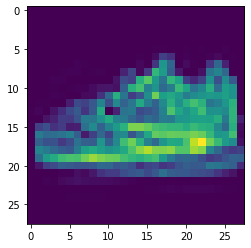

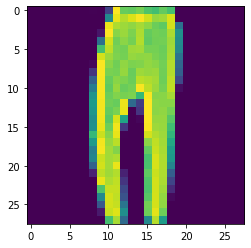

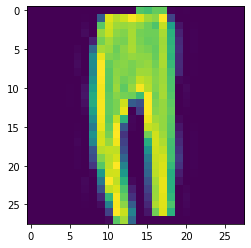

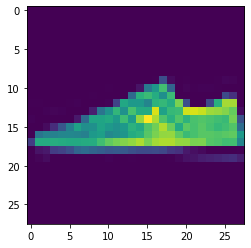

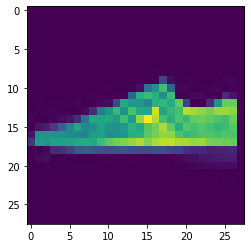

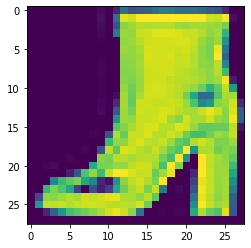

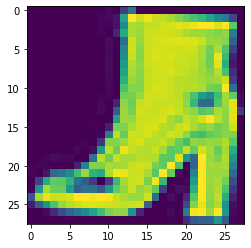

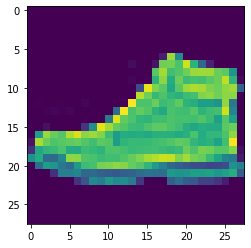

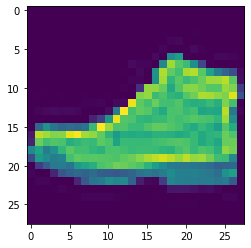

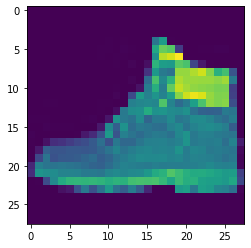

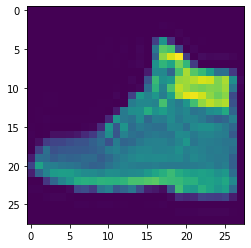

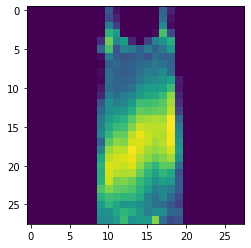

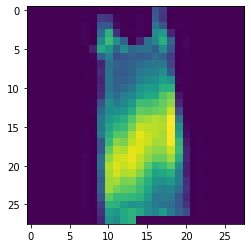

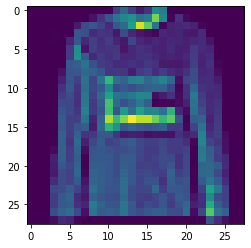

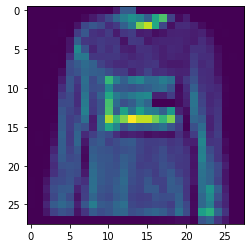

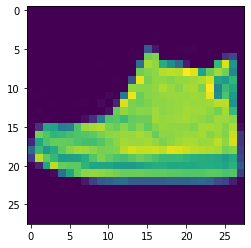

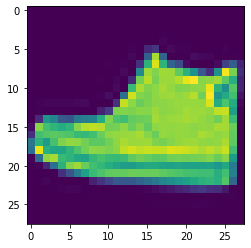

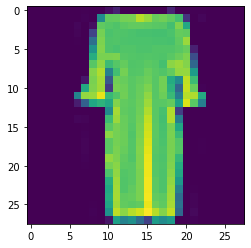

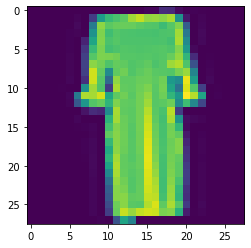

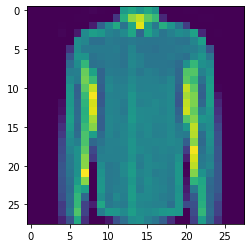

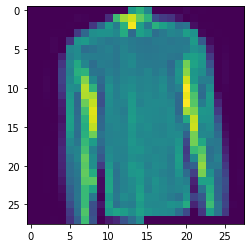

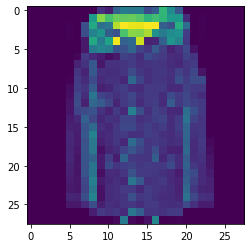

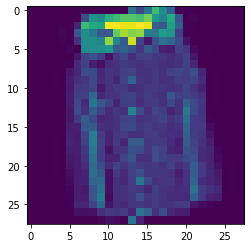

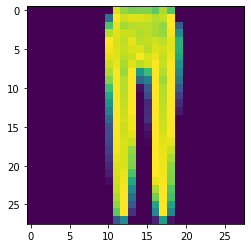

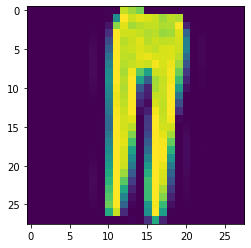

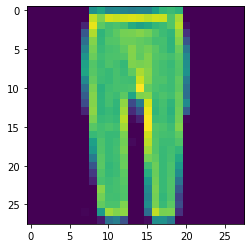

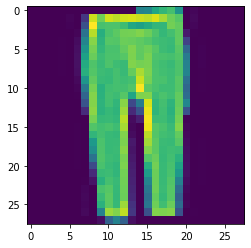

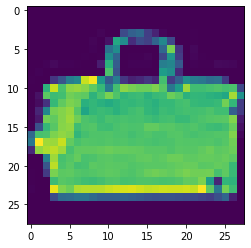

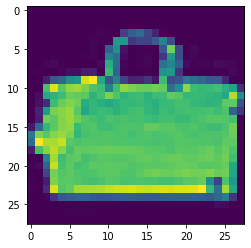

In [47]:
for i in range(100):
    plt.imshow(x_train[i], interpolation ='nearest')
    plt.show()
    plt.imshow(rotate_image(x_train[i]), interpolation = 'nearest')
    plt.show()